In [1]:
import wrf as w
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import pandas as pd 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cmaps
import os 
from zIO import load_prec, load_cmfd, load_wrflist
from zMap import set_grid, add_NamCo
import warnings
warnings.filterwarnings("ignore")

if __name__ == '__main__':
    data_dir = '/home/zzhzhao/Model/wrfout'
    testname_list = [
        'cmfd',
        'test-25-3',
        'test-25-NL',
        'test-25-NM',
        ]
    
    N_test = len(testname_list)
    date_start = '2013-08-23'
    date_end = '2013-09-01'
    lat_range = (28, 34)
    lon_range = (86, 94)

    prec_list = dict()
    prec_sum_list = dict()
    for testname in testname_list:
        if testname == 'cmfd':
            cmfd = load_cmfd(date_start, date_end, lat_range, lon_range)
            prec_list[testname] = cmfd
            prec_sum_list[testname] = cmfd.sum(dim='time')
        else:
            data_path = os.path.join(data_dir, testname)
            domain = 1 
            prec, lats, lons, time = load_prec(data_path, domain)
            prec = xr.where(prec>0, prec, np.nan)
            prec_list[testname] = prec
            # prec_sum_list[testname] = prec.sum(dim='Time')
            prec_sum_list[testname] = prec.sel(Time=slice(date_start,date_end)).sum(dim='Time') 


### 累计降水分布

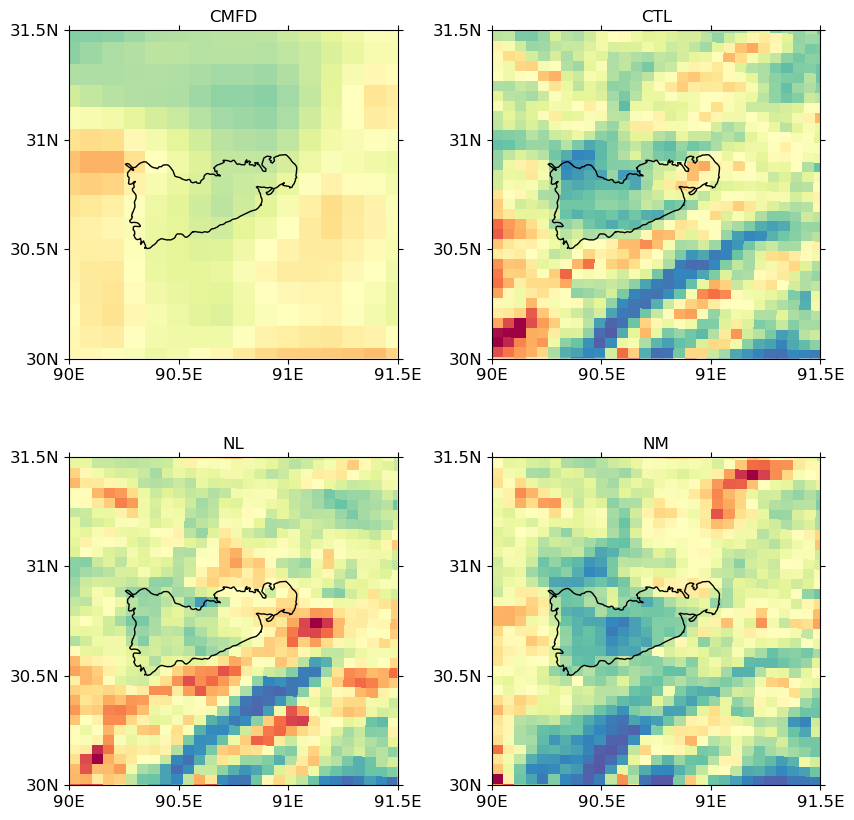

In [3]:

    labels = [
        'CMFD',
        'CTL',
        'NL', 
        'NM', 
        ]
    proj = ccrs.PlateCarree()
    cmap = 'Spectral_r'#cmaps.WhiteBlueGreenYellowRed
    ylen = np.ceil(np.sqrt(N_test)).astype(int); xlen = np.ceil(N_test/ylen).astype(int)
    default_len = 5

    fig = plt.figure(figsize=(xlen*default_len, ylen*default_len), dpi=100)
    fig.subplots_adjust(hspace=0.3, wspace=0.2)
    axes = []
    for i, testname in enumerate(testname_list):
        ax = fig.add_subplot(ylen, xlen, i+1, projection=proj)
        var = prec_sum_list[testname]
        if testname == 'cmfd':
            lat, lon = prec_sum_list[testname].lat, prec_sum_list[testname].lon 
        else:
            lat, lon = w.latlon_coords(var)
    
        set_grid(ax, lat=[30, 31.5], lon=[90, 91.5], span=.5)
        # set_grid(ax, lat=[29, 32], lon=[89, 92], span=.5)
        add_NamCo(ax)
        c = ax.pcolor(lon, lat, var, cmap=cmap, vmin=0, vmax=100, transform=proj)
        ax.set_title(labels[i])
     
        # axes.append(ax)
        
    # cb = fig.colorbar(c, ax=np.array(axes).all(), orientation='horizontal', pad=0.05, shrink=0.9, aspect=35)
    # cb.set_label('Precipitation / mm', fontsize=14)

